In [0]:
!git clone https://github.com/suvarnak/code-colt.git
!ls code-colt/data/cats_and_dogs/
!pip install keras

Cloning into 'code-colt'...
remote: Counting objects: 27633, done.
remote: Total 27633 (delta 0), reused 0 (delta 0), pack-reused 27633
Receiving objects: 100% (27633/27633), 1.69 GiB | 50.36 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Checking out files: 100% (31355/31355), done.
test  train  valid


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

# kaggle dataset image size
img_width, img_height = 150, 150
train_data_dir = 'code-colt/data/cats_and_dogs//train'
validation_data_dir = 'code-colt/data/cats_and_dogs//valid'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical([0,1], num_classes=2)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)
model.summary()
#model.save_weights('first_try.h5')
model.save('model-cats_dogs_model2.h5')

Using TensorFlow backend.


Found 21500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 22s 180ms/step - loss: 0.7117 - acc: 0.5515 - val_loss: 0.6727 - val_acc: 0.5363
Epoch 2/50
125/125 [==============================] - 20s 158ms/step - loss: 0.6690 - acc: 0.6030 - val_loss: 0.6522 - val_acc: 0.6950
Epoch 3/50
100/125 [=======================>......] - ETA: 3s - loss: 0.6530 - acc: 0.6275

125/125 [==============================] - 20s 158ms/step - loss: 0.6481 - acc: 0.6335 - val_loss: 0.6131 - val_acc: 0.6987
Epoch 4/50
125/125 [==============================] - 20s 158ms/step - loss: 0.6256 - acc: 0.6735 - val_loss: 0.5985 - val_acc: 0.6750
Epoch 5/50
125/125 [==============================] - 20s 157ms/step - loss: 0.6190 - acc: 0.6720 - val_loss: 0.5722 - val_acc: 0.7075
Epoch 6/50
 69/125 [===============>..............] - ETA: 6s - loss: 0.5816 - acc: 0.7029

125/125 [==============================] - 20s 158ms/step - loss: 0.5881 - acc: 0.6900 - val_loss: 0.5339 - val_acc: 0.7362
Epoch 7/50
125/125 [==============================] - 20s 157ms/step - loss: 0.5614 - acc: 0.7100 - val_loss: 0.6231 - val_acc: 0.7013
Epoch 8/50
125/125 [==============================] - 20s 157ms/step - loss: 0.5810 - acc: 0.7090 - val_loss: 0.5669 - val_acc: 0.6987
Epoch 9/50
 64/125 [==============>...............] - ETA: 7s - loss: 0.5538 - acc: 0.7305

125/125 [==============================] - 19s 156ms/step - loss: 0.5677 - acc: 0.7210 - val_loss: 0.5975 - val_acc: 0.7037
Epoch 10/50
125/125 [==============================] - 20s 159ms/step - loss: 0.5655 - acc: 0.7280 - val_loss: 0.5872 - val_acc: 0.7200
Epoch 11/50
125/125 [==============================] - 20s 158ms/step - loss: 0.5439 - acc: 0.7270 - val_loss: 0.4872 - val_acc: 0.7738
Epoch 12/50
 61/125 [=============>................] - ETA: 7s - loss: 0.5342 - acc: 0.7387

125/125 [==============================] - 20s 160ms/step - loss: 0.5333 - acc: 0.7480 - val_loss: 0.4907 - val_acc: 0.7688
Epoch 13/50
125/125 [==============================] - 19s 155ms/step - loss: 0.5299 - acc: 0.7492 - val_loss: 0.5084 - val_acc: 0.7638
Epoch 14/50
 68/125 [===============>..............] - ETA: 6s - loss: 0.5301 - acc: 0.7518

125/125 [==============================] - 20s 156ms/step - loss: 0.5180 - acc: 0.7575 - val_loss: 0.5312 - val_acc: 0.7488
Epoch 16/50
125/125 [==============================] - 20s 158ms/step - loss: 0.5180 - acc: 0.7485 - val_loss: 0.5556 - val_acc: 0.7300
Epoch 17/50
125/125 [==============================] - 20s 158ms/step - loss: 0.5076 - acc: 0.7505 - val_loss: 0.5354 - val_acc: 0.7250
Epoch 18/50
 63/125 [==============>...............] - ETA: 7s - loss: 0.5071 - acc: 0.7738

125/125 [==============================] - 20s 158ms/step - loss: 0.5134 - acc: 0.7595 - val_loss: 0.5484 - val_acc: 0.7312
Epoch 19/50
125/125 [==============================] - 20s 159ms/step - loss: 0.5312 - acc: 0.7585 - val_loss: 0.5217 - val_acc: 0.7700
Epoch 20/50
125/125 [==============================] - 20s 157ms/step - loss: 0.4901 - acc: 0.7780 - val_loss: 0.4722 - val_acc: 0.7925
Epoch 21/50
 62/125 [=============>................] - ETA: 7s - loss: 0.5176 - acc: 0.7782

125/125 [==============================] - 20s 157ms/step - loss: 0.5145 - acc: 0.7675 - val_loss: 0.4628 - val_acc: 0.7762
Epoch 22/50
125/125 [==============================] - 20s 159ms/step - loss: 0.4877 - acc: 0.7765 - val_loss: 0.4936 - val_acc: 0.7788
Epoch 23/50
125/125 [==============================] - 19s 155ms/step - loss: 0.4815 - acc: 0.7740 - val_loss: 0.4913 - val_acc: 0.7538
Epoch 24/50
 62/125 [=============>................] - ETA: 7s - loss: 0.5300 - acc: 0.7329

125/125 [==============================] - 20s 158ms/step - loss: 0.5131 - acc: 0.7440 - val_loss: 0.5904 - val_acc: 0.7362
Epoch 25/50
125/125 [==============================] - 20s 157ms/step - loss: 0.5160 - acc: 0.7530 - val_loss: 0.5586 - val_acc: 0.7450
Epoch 26/50
125/125 [==============================] - 20s 159ms/step - loss: 0.5040 - acc: 0.7610 - val_loss: 0.5581 - val_acc: 0.7338
Epoch 27/50
 62/125 [=============>................] - ETA: 7s - loss: 0.5119 - acc: 0.7571

125/125 [==============================] - 20s 158ms/step - loss: 0.5106 - acc: 0.7685 - val_loss: 0.4733 - val_acc: 0.7738
Epoch 28/50
125/125 [==============================] - 20s 158ms/step - loss: 0.4921 - acc: 0.7690 - val_loss: 0.5102 - val_acc: 0.7562
Epoch 29/50
125/125 [==============================] - 20s 157ms/step - loss: 0.4832 - acc: 0.7790 - val_loss: 0.4573 - val_acc: 0.7850
Epoch 30/50
 62/125 [=============>................] - ETA: 7s - loss: 0.4646 - acc: 0.7812

125/125 [==============================] - 20s 157ms/step - loss: 0.4715 - acc: 0.7845 - val_loss: 0.5323 - val_acc: 0.7425
Epoch 31/50
125/125 [==============================] - 19s 155ms/step - loss: 0.4882 - acc: 0.7768 - val_loss: 0.4753 - val_acc: 0.7800
Epoch 32/50
125/125 [==============================] - 19s 156ms/step - loss: 0.4769 - acc: 0.7840 - val_loss: 0.4893 - val_acc: 0.8037
Epoch 33/50
 62/125 [=============>................] - ETA: 7s - loss: 0.4864 - acc: 0.7843

125/125 [==============================] - 20s 161ms/step - loss: 0.4711 - acc: 0.8010 - val_loss: 0.5370 - val_acc: 0.7638
Epoch 34/50
125/125 [==============================] - 20s 157ms/step - loss: 0.4690 - acc: 0.7835 - val_loss: 0.4777 - val_acc: 0.7738
Epoch 35/50
125/125 [==============================] - 20s 159ms/step - loss: 0.4956 - acc: 0.7810 - val_loss: 0.5734 - val_acc: 0.7325
Epoch 36/50
 62/125 [=============>................] - ETA: 7s - loss: 0.4504 - acc: 0.7923

125/125 [==============================] - 20s 157ms/step - loss: 0.4608 - acc: 0.7885 - val_loss: 0.4793 - val_acc: 0.7925
Epoch 37/50
125/125 [==============================] - 20s 156ms/step - loss: 0.4743 - acc: 0.7755 - val_loss: 0.5949 - val_acc: 0.7388
Epoch 38/50
125/125 [==============================] - 20s 158ms/step - loss: 0.4482 - acc: 0.8015 - val_loss: 0.5220 - val_acc: 0.7262
Epoch 39/50
 62/125 [=============>................] - ETA: 7s - loss: 0.4745 - acc: 0.7752

125/125 [==============================] - 20s 157ms/step - loss: 0.4563 - acc: 0.7885 - val_loss: 0.4564 - val_acc: 0.7937
Epoch 40/50
125/125 [==============================] - 20s 159ms/step - loss: 0.4854 - acc: 0.7910 - val_loss: 0.4722 - val_acc: 0.7925
Epoch 41/50
125/125 [==============================] - 20s 158ms/step - loss: 0.4598 - acc: 0.7965 - val_loss: 0.5386 - val_acc: 0.7825
Epoch 42/50
 62/125 [=============>................] - ETA: 7s - loss: 0.4622 - acc: 0.7883

125/125 [==============================] - 20s 158ms/step - loss: 0.4541 - acc: 0.7920 - val_loss: 0.4955 - val_acc: 0.7825
Epoch 43/50
125/125 [==============================] - 19s 151ms/step - loss: 0.4505 - acc: 0.7940 - val_loss: 0.6417 - val_acc: 0.7562
Epoch 44/50
125/125 [==============================] - 21s 167ms/step - loss: 0.4602 - acc: 0.7967 - val_loss: 0.4805 - val_acc: 0.8100
Epoch 45/50
 57/125 [============>.................] - ETA: 8s - loss: 0.4701 - acc: 0.7610

125/125 [==============================] - 20s 157ms/step - loss: 0.4740 - acc: 0.7705 - val_loss: 0.4357 - val_acc: 0.8000
Epoch 46/50
125/125 [==============================] - 19s 156ms/step - loss: 0.4744 - acc: 0.7815 - val_loss: 0.4460 - val_acc: 0.8050
Epoch 47/50
125/125 [==============================] - 20s 159ms/step - loss: 0.4704 - acc: 0.7860 - val_loss: 0.4210 - val_acc: 0.8187
Epoch 48/50
 61/125 [=============>................] - ETA: 7s - loss: 0.4493 - acc: 0.7941

125/125 [==============================] - 20s 157ms/step - loss: 0.4521 - acc: 0.8000 - val_loss: 0.4240 - val_acc: 0.8075
Epoch 49/50
125/125 [==============================] - 20s 157ms/step - loss: 0.4678 - acc: 0.7850 - val_loss: 0.5820 - val_acc: 0.7625
Epoch 50/50
125/125 [==============================] - 20s 157ms/step - loss: 0.4547 - acc: 0.7985 - val_loss: 0.3903 - val_acc: 0.8387
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
__________

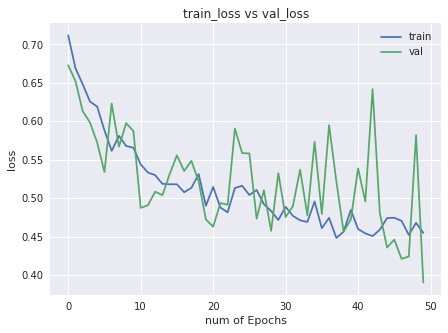

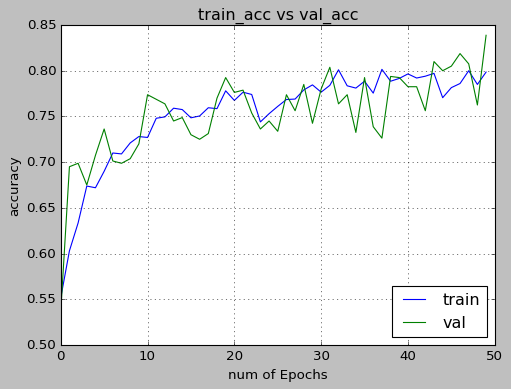

In [0]:
from matplotlib import pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(0,50)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_dir = 'code-colt/data/cats_and_dogs/test/'

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = "false",
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

#predict = model.predict_generator(test_generator,steps = nb_samples)
#predict

Found 1000 images belonging to 2 classes.


In [0]:
print(model.metrics_names)
loss,acc= model.evaluate_generator(test_generator)

print('Test loss:', loss)
print('Test accuracy:', acc)

['loss', 'acc']
Test loss: 0.42127542057858325
Test accuracy: 0.81


In [0]:
from google.colab import files
files.download('model-cats_dogs_model2.h5')